In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [40]:
df = pd.read_csv('healthcare-dataset-stroke-data (1).csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
print("\
Data types:")
print(df.dtypes)

Data types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [43]:
print("\
Basic statistics for numeric columns:")
print(df.describe())

Basic statistics for numeric columns:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%  

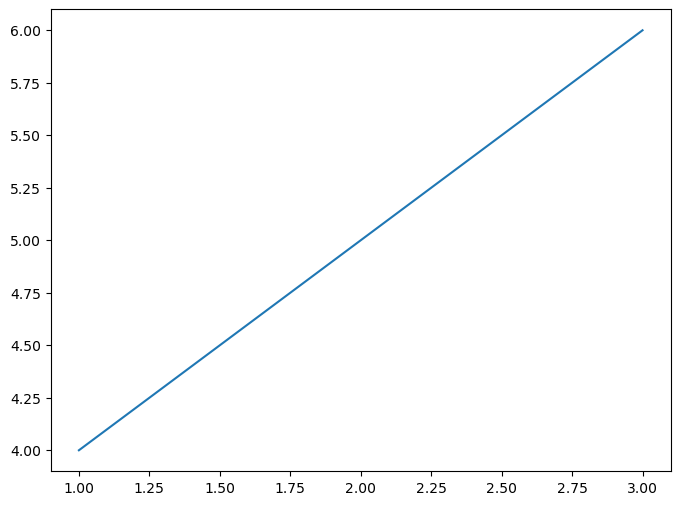

In [44]:
plt.figure(figsize=(8, 6)) 
plt.plot([1, 2, 3], [4, 5, 6])  
plt.show() 

In [45]:
categorical_cols = df.select_dtypes(exclude = 'number')
numerical_cols = df.select_dtypes(include='number')
print("Categorical columns that could serve as features: ")
display(categorical_cols.head())
print("\nNumerical columns that could serve as features: ")
display(numerical_cols.head())

Categorical columns that could serve as features: 


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked



Numerical columns that could serve as features: 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [46]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
import warnings
warnings.filterwarnings('ignore')

# fill in the missing values
for i in df.columns:
    if ((df[i].isnull().sum() / len(df)) * 100) < 30:
        if df[i].dtypes != 'O':
            df[i].fillna(df[i].median(), inplace = True)
        else:
            df[i].fillna(df[i].mode()[0], inplace = True)
    else:
        df.drop(i, axis = 1, inplace = True)

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [48]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [49]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

df.drop('id', axis = 1, inplace = True)
colsToScale= []

# Recalculate numerical_cols after dropping 'id'
numerical_cols = df.select_dtypes(include='number')

for i in numerical_cols.columns :
  if df[i].std() >1000 :
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb'))


for i in categorical_cols.columns:
  encoder = LabelEncoder()
  df[i] = encoder.fit_transform(df[i])
  joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [51]:
sel_cols= ['avg_glucose_level','bmi','age','smoking_status','heart_disease','gender','work_type','hypertension', 'stroke']
new_Data =df[sel_cols]
new_Data.head()

,avg_glucose_level,bmi,age,smoking_status,heart_disease,gender,work_type,hypertension,stroke
0,228.69,36.6,67.0,1,1,1,2,0,1
1,202.21,28.1,61.0,2,0,0,3,0,1
2,105.92,32.5,80.0,2,1,1,2,0,1
3,171.23,34.4,49.0,3,0,0,2,0,1
4,174.12,24.0,79.0,2,0,0,3,1,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x= new_Data.drop('stroke', axis = 1)
y= new_Data.stroke

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
print(f'X_train shape: {xtrain.shape}')
print(f'y_train shape: {ytrain.shape}')
print(f'X_test shape: {xtest.shape}')
print(f'y_test shape: {ytest.shape}')

X_train shape: (4088, 8)
y_train shape: (4088,)
X_test shape: (1022, 8)
y_test shape: (1022,)


,avg_glucose_level,bmi,age,smoking_status,heart_disease,gender,work_type,hypertension,stroke
4750,240.69,28.1,70.0,3,1,0,3,0,0
978,123.36,33.4,61.0,2,0,0,2,0,0
1051,63.53,26.9,27.0,2,0,1,3,0,0
3514,78.34,32.5,49.0,0,0,1,2,0,0
4361,89.14,22.6,16.0,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
576,207.58,22.8,29.0,3,0,1,2,0,0
1230,124.16,23.0,56.0,2,0,0,3,0,0
4836,208.69,30.0,73.0,0,0,1,0,0,0
405,70.21,24.8,78.0,2,1,0,0,0,0


<Axes: xlabel='stroke', ylabel='count'>

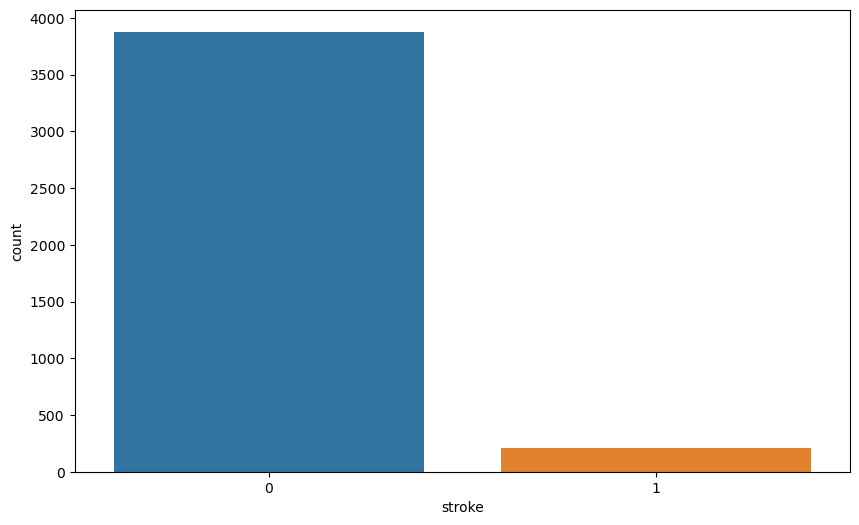

In [53]:
import seaborn as sns
training_data = pd.concat([xtrain, ytrain], axis=1)
plt.figure(figsize=(10, 6))

display(training_data)
sns.countplot(x= training_data['stroke'])

,avg_glucose_level,bmi,age,smoking_status,heart_disease,gender,work_type,hypertension,stroke
3567,75.67,44.7,33.0,2,0,0,0,0,0
4964,140.14,21.1,22.0,2,0,0,2,0,0
4025,104.55,16.3,5.0,0,0,1,4,0,0
3346,92.21,31.0,45.0,2,0,0,2,0,0
1527,76.11,37.0,66.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
174,60.67,28.1,78.0,1,0,0,3,0,1
161,81.76,28.1,71.0,3,1,1,2,0,1
154,92.98,25.6,55.0,2,0,0,3,0,1
223,70.30,25.8,81.0,3,0,0,0,0,1


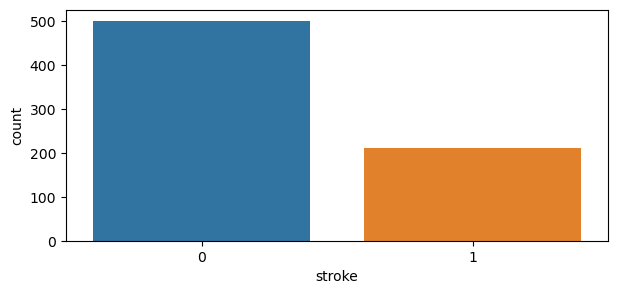

In [54]:
class0 = training_data.loc[training_data['stroke'] == 0]
class1 = training_data.loc[training_data['stroke'] == 1]

new_class0 = class0.sample(500)

new_training_data = pd.concat([new_class0, class1], axis = 0)

display(new_training_data)
plt.figure(figsize = (7,3))
sns.countplot(x = new_training_data['stroke'])
plt.show()



In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

x = new_training_data.drop('stroke', axis = 1)
y = new_training_data.stroke

model.fit(x, y)

LogisticRegression()

In [56]:
from sklearn.metrics import classification_report

cv = model.predict(xtest)
print(classification_report(cv, ytest))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       867
           1       0.67      0.17      0.27       155

    accuracy                           0.86      1022
   macro avg       0.77      0.58      0.60      1022
weighted avg       0.84      0.86      0.82      1022



In [57]:
joblib.dump(model, open('stroke_prediction_model.pkl', 'wb'))